# Proyek Akhir Data Analytics: Strategi Retensi Karyawan PT Vinix Seven Aurum
### Berdasarkan Dataset IBM HR Analytics Employee Attrition
---
**Tujuan Proyek:** Mengidentifikasi faktor pendorong utama Attrition dan memberikan Rekomendasi Actionable berbasis data.

# 1. Pemahaman Bisnis (Business Understanding)

A. Permasalahan Utama (Latar Belakang)
Berdasarkan dataset Attrition, masalah bisnis yang utama dan mendesak adalah Tingkat Attrition (Perpindahan/Keluar) Karyawan yang Tinggi.

Dampak Negatif: Tingkat attrition yang tinggi menyebabkan biaya rekrutmen dan pelatihan yang mahal, hilangnya pengetahuan institusional (knowledge retention), serta potensi penurunan produktivitas dan moral karyawan.

Tujuan Bisnis: Mengurangi attrition karyawan, meningkatkan retensi, dan mengoptimalkan lingkungan kerja.

# 2. Pemahaman Data (Data Understanding)
Dataset ini berisi 1470 baris (karyawan) dan 35 kolom (fitur/variabel) yang menjelaskan karakteristik karyawan, lingkungan kerja, dan kepuasan mereka.

A. Variabel Kunci (Target dan Prediktor)

1) Target – Attrition
Variabel Attrition menjadi fokus utama dalam analisis ini karena berfungsi sebagai target yang akan diprediksi, dengan dua kemungkinan nilai yaitu Yes atau No. Nilai Yes menunjukkan karyawan yang keluar dari perusahaan, sedangkan No menunjukkan karyawan yang tetap bertahan. Analisis terhadap variabel ini membantu organisasi memahami faktor-faktor yang berkontribusi terhadap tingkat turnover karyawan.

2) Penting – JobRole, JobLevel, MonthlyIncome
Variabel-variabel ini mencerminkan posisi, tanggung jawab, dan kompensasi yang diterima karyawan. JobRole menunjukkan jabatan atau peran individu dalam organisasi, JobLevel merepresentasikan tingkatan atau level karir, dan MonthlyIncome menggambarkan tingkat penghasilan bulanan. Ketiganya menjadi indikator penting dalam menilai keseimbangan antara beban kerja dan penghargaan finansial, yang dapat memengaruhi keputusan karyawan untuk bertahan atau keluar.

3) Kepuasan – JobSatisfaction, EnvironmentSatisfaction, WorkLifeBalance, RelationshipSatisfaction
Kelompok variabel ini menggambarkan tingkat kepuasan karyawan terhadap berbagai aspek pekerjaan. JobSatisfaction menunjukkan kepuasan terhadap pekerjaan secara umum, EnvironmentSatisfaction menilai kenyamanan terhadap lingkungan kerja, WorkLifeBalance mengukur keseimbangan antara pekerjaan dan kehidupan pribadi, sementara RelationshipSatisfaction menggambarkan kualitas hubungan sosial di tempat kerja. Faktor-faktor ini berpengaruh langsung terhadap motivasi dan loyalitas karyawan.

4) Organisasi – Department, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion
Variabel dalam kategori ini berhubungan dengan struktur organisasi dan perkembangan karir. Department menunjukkan divisi tempat karyawan bekerja, YearsAtCompany menandakan lama masa kerja di perusahaan, YearsInCurrentRole menunjukkan durasi di posisi saat ini, dan YearsSinceLastPromotion mengukur waktu sejak promosi terakhir. Faktor-faktor ini memberikan gambaran tentang stabilitas, kesempatan pengembangan karir, dan persepsi karyawan terhadap keadilan organisasi.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Set style visualisasi
snshuuh_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.sans-serif'] = ['Arial'] # Menggunakan font standar

# --- 1. Memuat Dataset ---
file_path = "/content/WA_Fn-UseC_-HR-Employee-Attrition (1).csv"
try:
    df = pd.read_csv(file_path)
    print("Dataset berhasil dimuat.")
except FileNotFoundError:
    print(f"Error: File {file_path} tidak ditemukan. Pastikan file sudah diunggah ke Colab.")
    exit()

df.info()


Dataset berhasil dimuat.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14 

In [ ]:
df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# 3. Persiapan Data (Data Preparation)
A. Pemeriksaan Kualitas Data (Cleaning)
1) Pengecekan Nilai Hilang (Missing Values):
Hasil: Tidak ada nilai yang hilang (Null/NaN) di seluruh kolom (dataset ini dikenal sangat bersih). Aman.

2) Pengecekan Data Redundan (Column Dropping):
Beberapa kolom memiliki nilai tunggal (konstan) atau merupakan identifier unik yang tidak relevan untuk analisis faktor attrition (perpindahan karyawan).
Kolom yang Dihapus:
EmployeeCount, StandardHours, Over18: Semuanya memiliki nilai tunggal (1, 80, 'Y').
EmployeeNumber: ID unik, tidak relevan untuk analisis statistik.
DailyRate, HourlyRate, MonthlyRate: Dihapus untuk menyederhanakan dan fokus pada MonthlyIncome sebagai metrik kompensasi utama.
Total Kolom Baru: 28 kolom yang relevan.

B. Transformasi Variabel KunciVariabel perlu ditransformasi agar lebih mudah dibaca, dianalisis, dan divisualisasikan untuk stakeholder VIP.
1. Transformasi Variabel Target (Attrition)Variabel target akan diubah menjadi format biner (0 dan 1).
No (Tidak resign) = 0 (Retained)
Yes (Resign) = 1 (Attrition)

2. Binning (Pengelompokan) Variabel Numerik
Untuk meningkatkan kemudahan interpretasi data pada dashboard, beberapa variabel numerik penting dilakukan proses binning atau pengelompokan. Langkah ini bertujuan agar data kontinu dapat dikonversi menjadi kategori yang lebih mudah dipahami oleh pengguna non-teknis dan membantu dalam visualisasi yang lebih intuitif.
1) Age (Usia)
Variabel Age dikelompokkan menjadi tiga kategori utama, yaitu Young (< 30 tahun), Mid-Career (30–45 tahun), dan Senior (> 45 tahun). Pengelompokan ini membantu dalam memahami pola attrition berdasarkan tahapan usia, karena kebutuhan, stabilitas, dan motivasi kerja karyawan sering kali berbeda di setiap kelompok umur.
2) MonthlyIncome (Pendapatan Bulanan)
Variabel MonthlyIncome dikategorikan menjadi Low, Medium, dan High, dengan pembagian berdasarkan kuantil data. Teknik ini memastikan bahwa distribusi jumlah karyawan di tiap kategori relatif seimbang, sehingga memudahkan analisis hubungan antara tingkat pendapatan dan kemungkinan karyawan untuk keluar dari perusahaan.
3)TotalWorkingYears (Total Lama Bekerja)
Variabel TotalWorkingYears dikelompokkan ke dalam tiga tingkatan karir, yaitu Junior (< 5 tahun), Intermediate (5–15 tahun), dan Senior (> 15 tahun). Pembagian ini mencerminkan tahapan pengalaman kerja karyawan dan memungkinkan analisis yang lebih mendalam terhadap bagaimana lama pengalaman berpengaruh terhadap retensi karyawan dan kepuasan kerja.


C. Deskripsi Data Setelah Preparasi

Setelah melalui proses preparasi data, seperti pembersihan, pengelompokan (binning), dan transformasi variabel, dataset telah siap untuk dianalisis lebih lanjut. Tahapan ini memastikan bahwa setiap variabel memiliki format yang konsisten, nilai yang valid, serta mudah diinterpretasikan dalam analisis maupun visualisasi pada dashboard. Berikut ringkasan karakteristik utama dari data karyawan di PT Vinix Seven Aurum:
1) Attrition (Biner 0/1)
Variabel Attrition merupakan variabel target yang menunjukkan apakah seorang karyawan keluar dari perusahaan (1 = Yes) atau tetap bertahan (0 = No). Berdasarkan hasil deskriptif, tingkat attrition rata-rata berada pada 16,1%, yang menunjukkan bahwa sekitar satu dari enam karyawan meninggalkan perusahaan. Angka ini menjadi indikator penting dalam mengevaluasi tingkat retensi dan kepuasan kerja di organisasi.
2) Age (Numerik/Kategorikal)
Usia rata-rata karyawan tercatat sebesar 36,9 tahun, menunjukkan bahwa mayoritas karyawan berada pada tahap mid-career. Distribusi usia ini menandakan bahwa perusahaan memiliki tenaga kerja dengan pengalaman yang cukup matang, namun tetap berada pada usia produktif yang potensial untuk berkembang lebih lanjut.
3) MonthlyIncome (Numerik/Kategorikal)
Rata-rata pendapatan bulanan karyawan adalah $6.503, dengan variasi yang cukup signifikan antar level jabatan dan divisi. Nilai ini dapat menjadi acuan dalam mengidentifikasi apakah tingkat kompensasi telah sebanding dengan tanggung jawab, kinerja, serta kontribusi karyawan di berbagai posisi.
4) DistanceFromHome (Numerik)
Rata-rata jarak tempat tinggal karyawan ke kantor adalah sekitar 9,2 kilometer. Jarak ini berpotensi memengaruhi tingkat kehadiran, kelelahan, dan keseimbangan kehidupan kerja. Analisis lebih lanjut dapat mengungkap apakah jarak yang jauh memiliki hubungan dengan tingkat attrition yang lebih tinggi.
5) TotalWorkingYears (Numerik/Kategorikal)
Total pengalaman kerja rata-rata karyawan adalah 11,3 tahun, yang menunjukkan bahwa sebagian besar tenaga kerja memiliki latar belakang karier yang cukup stabil. Dengan adanya pengelompokan menjadi kategori Junior, Intermediate, dan Senior, variabel ini membantu memahami bagaimana pengalaman memengaruhi loyalitas serta kinerja karyawan.
6) JobLevel (Ordinal 1–5)
Variabel JobLevel menggambarkan posisi atau tingkatan jabatan dalam perusahaan. Mayoritas karyawan berada pada Level 1 dan 2, yang berarti sebagian besar bekerja pada posisi operasional dan menengah. Distribusi ini memberikan gambaran struktur organisasi yang cenderung piramidal, di mana jumlah tenaga pelaksana lebih besar dibandingkan posisi manajerial.

In [ ]:
# --- 2. Data Cleaning & Column Dropping ---
cols_to_drop = [
    'EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber',
    'DailyRate', 'HourlyRate', 'MonthlyRate'
]
df_prepared = df.drop(columns=cols_to_drop, errors='ignore')



In [ ]:
# --- 3. Transformasi Variabel Target (Attrition) ---
df_prepared['Attrition_Binary'] = df_prepared['Attrition'].map({'Yes': 1, 'No': 0})
df_prepared = df_prepared.drop(columns=['Attrition'])



In [ ]:
# --- 4. Feature Engineering (Binning) ---
# A. Binning Age
bins_age = [18, 30, 45, 60]
labels_age = ['Young (<30)', 'Mid-Career (30-45)', 'Senior (>45)']
df_prepared['Age_Group'] = pd.cut(df_prepared['Age'], bins=bins_age, labels=labels_age, right=False, include_lowest=True)

# B. Binning MonthlyIncome
income_quantiles = df_prepared['MonthlyIncome'].quantile([0.33, 0.66])
bins_income = [df_prepared['MonthlyIncome'].min(), income_quantiles.iloc[0], income_quantiles.iloc[1], df_prepared['MonthlyIncome'].max()]
labels_income = ['Low Income', 'Medium Income', 'High Income']
df_prepared['Income_Level'] = pd.cut(df_prepared['MonthlyIncome'], bins=bins_income, labels=labels_income, include_lowest=True)

# C. Binning TotalWorkingYears
bins_years = [0, 5, 15, df_prepared['TotalWorkingYears'].max()]
labels_years = ['Junior (<5 Yrs)', 'Intermediate (5-15 Yrs)', 'Senior (>15 Yrs)']
df_prepared['Working_Years_Group'] = pd.cut(df_prepared['TotalWorkingYears'], bins=bins_years, labels=labels_years, include_lowest=True)

print("\n--- 3. Hasil Data Preparation ---")
display(df_prepared.head())



# D. Binning DistanceFromHome
bins_distance = [0, 10, 20, df_prepared['DistanceFromHome'].max() + 1]
labels_distance = ['Close (<10 km)', 'Medium (10-20 km)', 'Far (>20 km)']
df_prepared['Distance_Group'] = pd.cut(
    df_prepared['DistanceFromHome'],
    bins=bins_distance,
    labels=labels_distance,
    right=False,
    include_lowest=True
)




--- 3. Hasil Data Preparation ---


,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Binary,Age_Group,Income_Level,Working_Years_Group
0,41,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,2,...,0,1,6,4,0,5,1,Mid-Career (30-45),Medium Income,Intermediate (5-15 Yrs)
1,49,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,2,...,3,3,10,7,1,7,0,Senior (>45),Medium Income,Intermediate (5-15 Yrs)
2,37,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,1,...,3,3,0,0,0,0,1,Mid-Career (30-45),Low Income,Intermediate (5-15 Yrs)
3,33,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,1,...,3,3,8,7,3,0,0,Mid-Career (30-45),Low Income,Intermediate (5-15 Yrs)
4,27,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,1,...,3,3,2,2,2,2,0,Young (<30),Low Income,Intermediate (5-15 Yrs)


In [ ]:
# --- 5. Cek Ulang Dataset yang Sudah di Preparation ---
print("\n--- Cek Missing Values ---")
print(df_prepared.isna().sum())

print("\n--- Cek Duplikasi ---")
dupe_count = df_prepared.duplicated().sum()
print(f"Jumlah duplikat: {dupe_count}")






--- Cek Missing Values ---
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition_Binary            0
Age_Group                   5
Income_Level                0
Working_Years_Group         0
Distance_Group              0
dtype: int64

In [ ]:
#  Hapus missing values:
df_prepared = df_prepared.dropna()
print("\nMissing values setelah drop:")
print(df_prepared.isna().sum())





Missing values setelah drop:
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition_Binary            0
Age_Group                   0
Income_Level                0
Working_Years_Group         0
Distance_Group              0
dtype: int

In [ ]:
# Ringkasan Hasil Dibersihkan
print("\n--- Hasil Akhir Setelah Cleaning Tambahan ---")
print(df_prepared.shape)
display(df_prepared.head())


--- Hasil Akhir Setelah Cleaning Tambahan ---
(1465, 32)


,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Binary,Age_Group,Income_Level,Working_Years_Group,Distance_Group
0,41,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,2,...,1,6,4,0,5,1,Mid-Career (30-45),Medium Income,Intermediate (5-15 Yrs),Close (<10 km)
1,49,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,2,...,3,10,7,1,7,0,Senior (>45),Medium Income,Intermediate (5-15 Yrs),Close (<10 km)
2,37,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,1,...,3,0,0,0,0,1,Mid-Career (30-45),Low Income,Intermediate (5-15 Yrs),Close (<10 km)
3,33,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,1,...,3,8,7,3,0,0,Mid-Career (30-45),Low Income,Intermediate (5-15 Yrs),Close (<10 km)
4,27,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,1,...,3,2,2,2,2,0,Young (<30),Low Income,Intermediate (5-15 Yrs),Close (<10 km)


In [ ]:
# --- 6 Menyimpan Dataset yang Sudah Dipersiapkan ---
# Nama file output
output_file_path = "HR Semoga Sudah Bersih.csv"

# Simpan DataFrame ke CSV.
# index=False agar kolom indeks (yang tidak relevan) tidak ikut tersimpan di file.
df_prepared.to_csv(output_file_path, index=False)

print(f"\n Dataset yang telah dipersiapkan berhasil disimpan ke: {output_file_path}")
print(f"File siap untuk digunakan pada tahap modeling atau dashboard.")


✅ Dataset yang telah dipersiapkan berhasil disimpan ke: HR Semoga Sudah Bersih.csv
File siap untuk digunakan pada tahap modeling atau dashboard.




---



---



# 4.  Eksplorasi data Analis (EDA)

## KORELASI ANTAR FITUR NUMERIK

In [ ]:
# Tampilkan korelasi terhadap Attrition_Binary secara terpisah untuk insight cepat
print("\n--- Korelasi terhadap Attrition_Binary (Insight Cepat) ---")
print(correlation_matrix['Attrition_Binary'].sort_values(ascending=False).drop('Attrition_Binary').to_string())


--- Korelasi terhadap Attrition_Binary (Insight Cepat) ---
NumCompaniesWorked         0.044395
PercentSalaryHike         -0.013017
YearsSinceLastPromotion   -0.031747
YearsAtCompany            -0.133999
YearsWithCurrManager      -0.155826
Age                       -0.157197
MonthlyIncome             -0.159202
YearsInCurrentRole        -0.160373
TotalWorkingYears         -0.170218


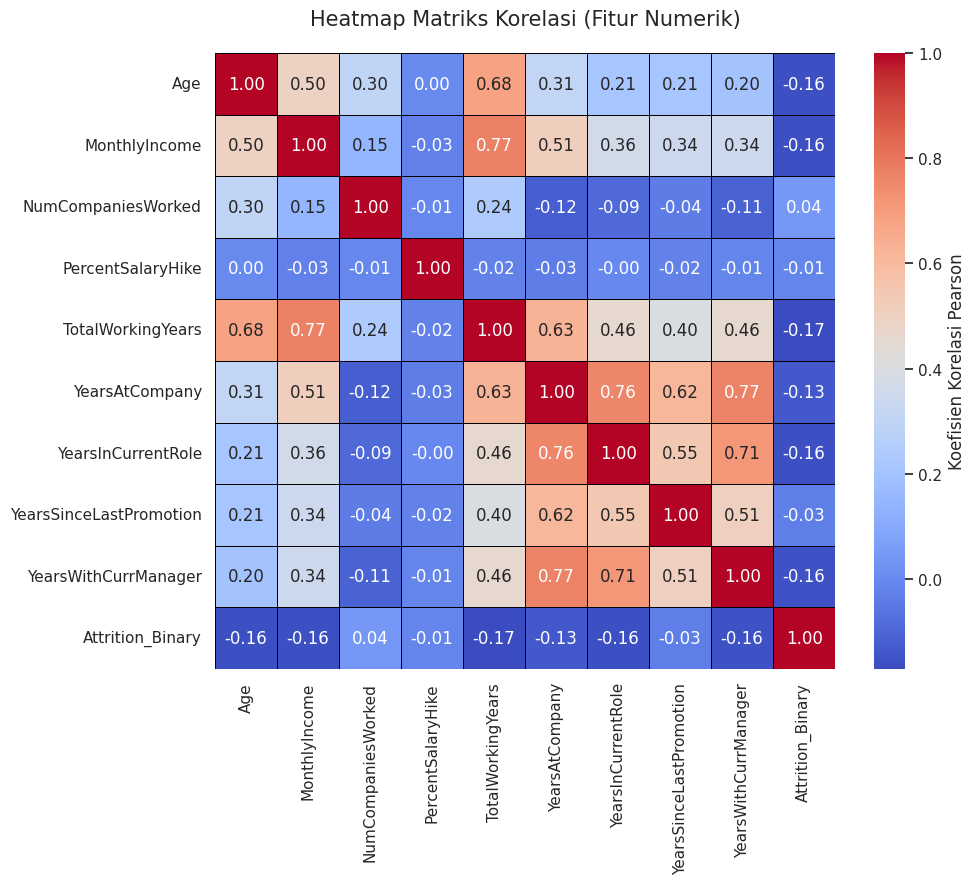

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Muat data yang sudah bersih
file_path = 'HR Semoga Sudah Bersih.csv'
df_prepared = pd.read_csv(file_path)

# Pilih semua kolom numerik dan biner yang tersisa (termasuk yang tidak di-binning)
# Perhatikan bahwa MonthlyIncome, TotalWorkingYears, dan Age sudah di-binning, tapi kita tetap analisis numerik aslinya.
numerical_cols = [
    'Age', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
    'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
    'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Binary'
]

# Hitung Matriks Korelasi
correlation_matrix = df_prepared[numerical_cols].corr()

# Tentukan ukuran plot
plt.figure(figsize=(10, 8))

# Buat Heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,          # Menampilkan nilai korelasi di setiap kotak
    fmt=".2f",           # Format 2 angka desimal
    cmap='coolwarm',     # Pilihan warna (biru/merah untuk positif/negatif)
    linewidths=.5,       # Garis antar kotak
    linecolor='black',
    cbar_kws={'label': 'Koefisien Korelasi Pearson'}
)

plt.title('Heatmap Matriks Korelasi (Fitur Numerik)', fontsize=15, pad=20)
plt.show()



## KORELASI ANTAR FITUR KATEGORIKAL

In [ ]:
import pandas as pd

file_path = 'HR Semoga Sudah Bersih.csv'
df_prepared = pd.read_csv(file_path)

# Fitur-fitur Kategorikal yang Paling Penting
categorical_features = [
    'OverTime',
    'Age_Group',
    'Income_Level',
    'Distance_Group',
    'MaritalStatus'
]

print("\n--- Insight Cepat: Angka Tingkat Attrition (%) ---")

for feature in categorical_features:
    # Menghitung Tingkat Attrition: (Rata-rata Attrition_Binary) * 100
    attrition_rate = (df_prepared.groupby(feature)['Attrition_Binary'].mean() * 100).sort_values(ascending=False)

    print(f"\n--- {feature} ---")
    print(attrition_rate.to_string(header=False, float_format="%.1f%%"))


--- Insight Cepat: Angka Tingkat Attrition (%) ---

--- OverTime ---
Yes   30.6%
No    10.5%

--- Age_Group ---
Young (<30)          27.9%
Mid-Career (30-45)   13.3%
Senior (>45)         11.7%

--- Income_Level ---
Low Income      26.4%
Medium Income   11.8%
High Income     10.5%

--- Distance_Group ---
Far (>20 km)        21.5%
Medium (10-20 km)   18.3%
Close (<10 km)      14.2%

--- MaritalStatus ---
Single     25.6%
Married    12.5%
Divorced   10.2%


/tmp/ipython-input-4189305655.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-4189305655.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-4189305655.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-4189305655.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-4189305655.py:27: FutureWarning: 

Passin

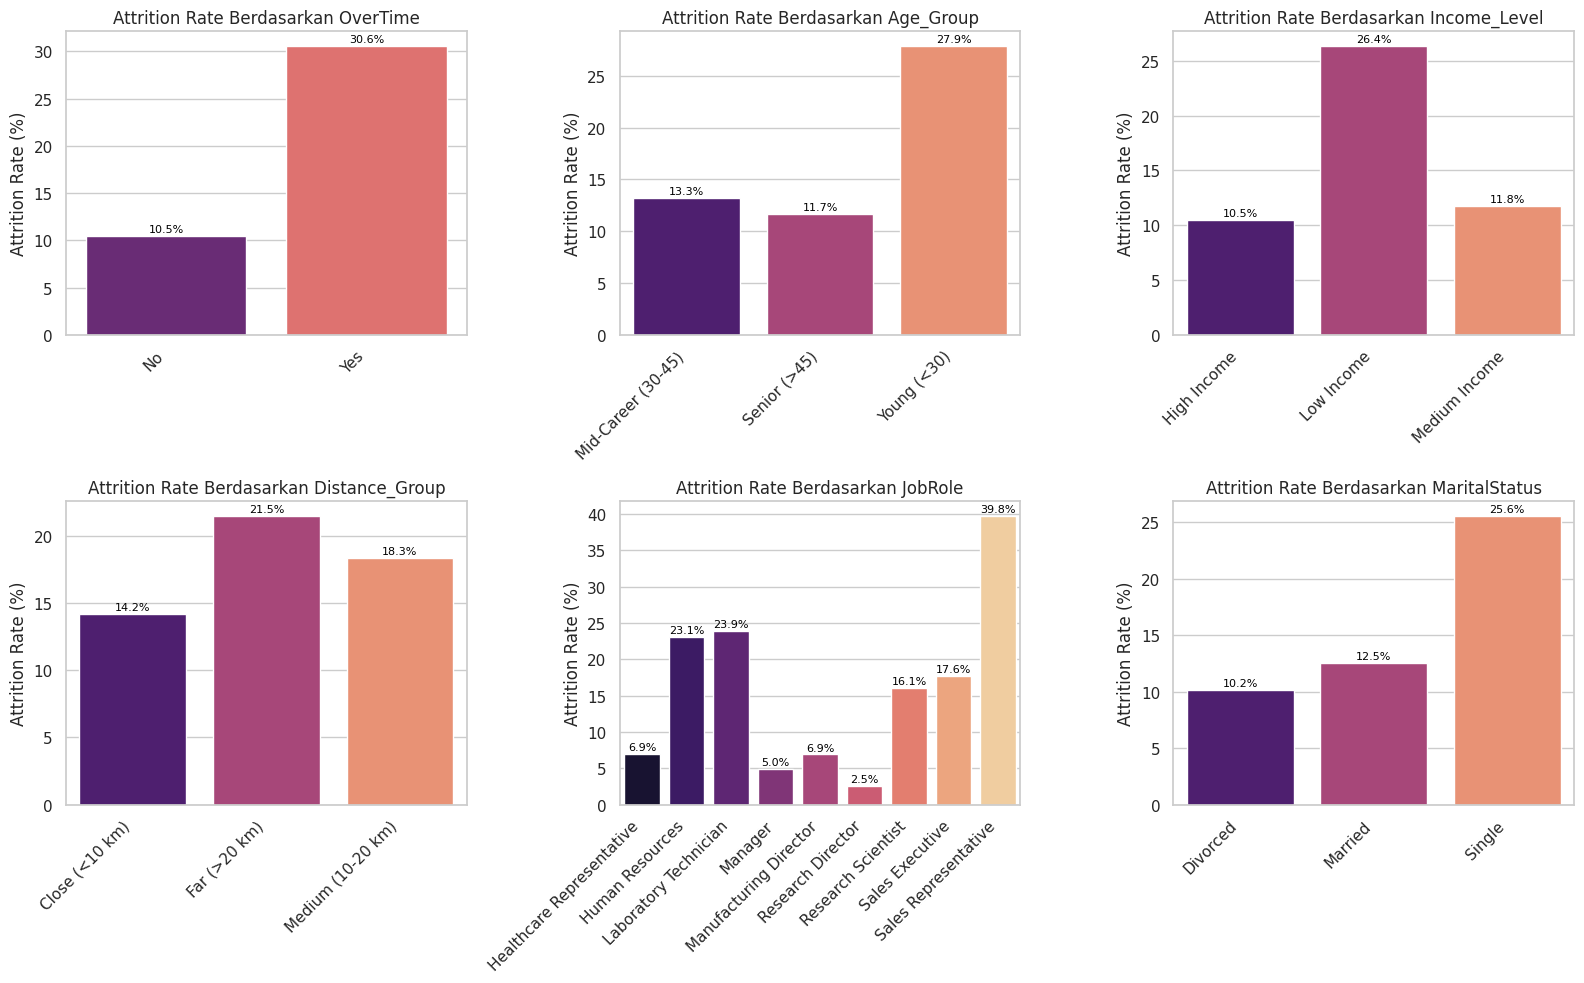

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_prepared = pd.read_csv(file_path)

# Fitur-fitur Kategorikal yang Paling Penting untuk Dashboard
categorical_features = [
    'OverTime',
    'Age_Group',
    'Income_Level',
    'Distance_Group',
    'JobRole',
    'MaritalStatus'
]

plt.figure(figsize=(16, 10))

for i, feature in enumerate(categorical_features):
    # Hitung Attrition Rate per kelompok: Rata-rata Attrition_Binary * 100
    attrition_rate = df_prepared.groupby(feature)['Attrition_Binary'].mean() * 100

    # Subplot
    ax = plt.subplot(2, 3, i + 1)

    # Buat Bar Plot
    sns.barplot(
        x=attrition_rate.index,
        y=attrition_rate.values,
        ax=ax,
        palette='magma' # Pilihan warna
    )

    # Tambahkan label nilai persentase
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

    ax.set_title(f'Attrition Rate Berdasarkan {feature}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Attrition Rate (%)')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



---



---



# DISTRIBUSI ANTAR VARIABEL

## 1. Distribusi karyawan berdasarkan kelompok usia di perusahaan

Tujuan : Mengetahui proporsi karyawan di setiap kelompok usia untuk memahami struktur demografi tenaga kerja dan potensi risiko attrition berdasarkan usia.

In [ ]:
print("\nDistribusi Usia:")
display(df_prepared['Age_Group'].value_counts().to_frame('Count'))




Distribusi Usia:


,Count
Age_Group,
Mid-Career (30-45),830
Young (<30),326
Senior (>45),309


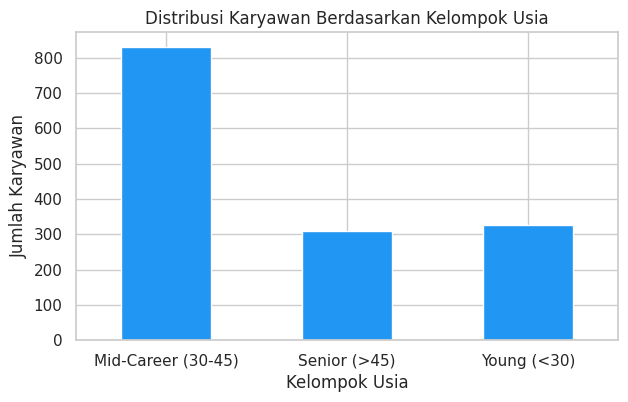

In [ ]:
import matplotlib.pyplot as plt

age_counts = df_prepared['Age_Group'].value_counts().sort_index()

plt.figure(figsize=(7,4))
age_counts.plot(kind='bar', color='#2196F3')
plt.title('Distribusi Karyawan Berdasarkan Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Karyawan')
plt.xticks(rotation=0)
plt.show()


## 2. Distribusi karyawan berdasarkan tingkat pendapatan di perusahaan

Tujuan : Mengidentifikasi proporsi karyawan di setiap kelompok pendapatan untuk memahami struktur kompensasi dan potensi kaitannya dengan tingkat keluar karyawan (attrition)

In [ ]:
print("\nDistribusi Tingkat Pendapatan:")
display(df_prepared['Income_Level'].value_counts().to_frame('Count'))




Distribusi Tingkat Pendapatan:


,Count
Income_Level,
High Income,500
Low Income,485
Medium Income,485


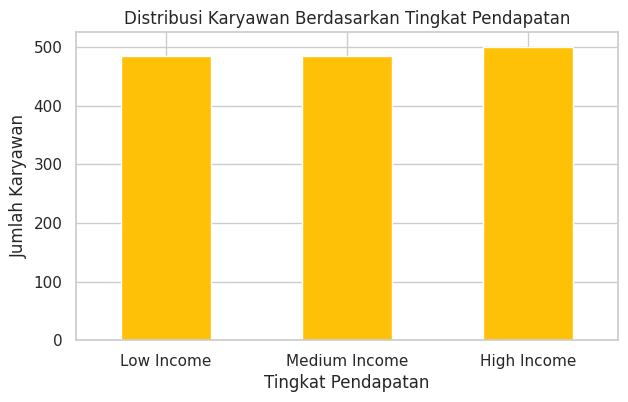

In [ ]:
import matplotlib.pyplot as plt

income_counts = df_prepared['Income_Level'].value_counts().sort_index()

plt.figure(figsize=(7,4))
income_counts.plot(kind='bar', color='#FFC107')
plt.title('Distribusi Karyawan Berdasarkan Tingkat Pendapatan')
plt.xlabel('Tingkat Pendapatan')
plt.ylabel('Jumlah Karyawan')
plt.xticks(rotation=0)
plt.show()


## 3.Distribusi karyawan berdasarkan kelompok pengalaman kerja di perusahaan

Tujuan : Menganalisis proporsi karyawan di setiap kelompok pengalaman kerja untuk memahami struktur tenaga kerja dan mengidentifikasi potensi risiko attrition berdasarkan lama masa kerja.

In [ ]:
print("\nDistribusi Kelompok Pengalaman Kerja:")
display(df_prepared['Working_Years_Group'].value_counts().to_frame('Count'))


Distribusi Kelompok Pengalaman Kerja:


,Count
Working_Years_Group,
Intermediate (5-15 Yrs),798
Senior (>15 Yrs),356
Junior (<5 Yrs),316


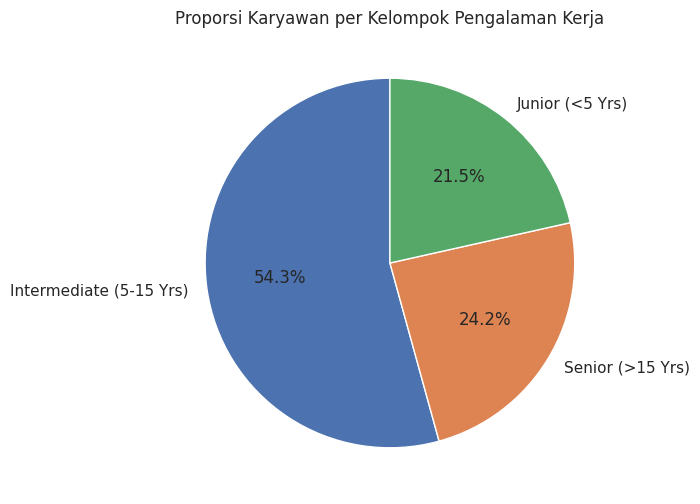

In [ ]:
working_years_counts = df_prepared['Working_Years_Group'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(working_years_counts, labels=working_years_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Karyawan per Kelompok Pengalaman Kerja')
plt.show()



---



---



# PERTANYAAN BISNIS

## 1. Seberapa tinggi tingkat attrition (keluar) karyawan secara keseluruhan di perusahaan?

Tujuan : Mengetahui proporsi karyawan yang keluar untuk mengukur tingkat retensi dan mendeteksi potensi masalah dalam manajemen SDM.

In [ ]:
# Ringkasan Attrition Rate Global
print("\n--- Ringkasan Distribusi Variabel Kunci (setelah Binning) ---")
attrition_summary = pd.DataFrame({
    'Metric': ['Total Rows', 'Attrition Rate'],
    'Value': [
        df_prepared.shape[0],
        f"{df_prepared['Attrition_Binary'].mean() * 100:.2f}%"
    ]
})
display(attrition_summary)




--- Ringkasan Distribusi Variabel Kunci (setelah Binning) ---


,Metric,Value
0,Total Rows,1465
1,Attrition Rate,16.18%


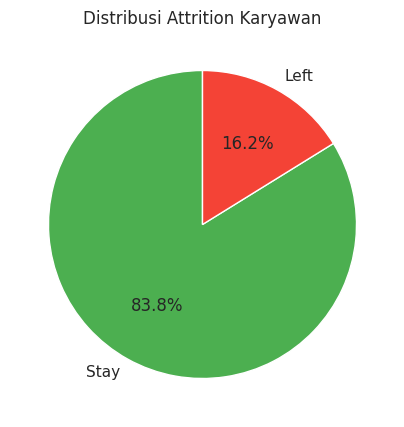

In [ ]:
import matplotlib.pyplot as plt

# Hitung distribusi attrition
attrition_counts = df_prepared['Attrition_Binary'].value_counts()
labels = ['Stay', 'Left']
colors = ['#4CAF50', '#F44336']

plt.figure(figsize=(5,5))
plt.pie(attrition_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribusi Attrition Karyawan')
plt.show()


## 2. Apakah kerja lembur (OverTime) merupakan faktor risiko signifikan terhadap Retensi Karyawan kita di PT Vinix Seven Aurum? Jika ya, seberapa besar risikonya dibandingkan karyawan yang tidak lembur?

Tujuan :  Mengukur secara kuantitatif tingkat risiko Attrition yang ditimbulkan oleh Lembur (OverTime) agar manajemen dapat memvalidasi dan memprioritaskan intervensi kebijakan keseimbangan kerja

In [ ]:

# --- Analisis Attrition Rate berdasarkan OverTime ---
print("--- Attrition Rate berdasarkan OverTime ---")
# Hitung rata-rata Attrition (1) per kategori OverTime
attrition_by_overtime = df_prepared.groupby('OverTime')['Attrition_Binary'].mean().sort_values(ascending=False)
attrition_by_overtime_df = attrition_by_overtime.to_frame(name='Attrition Rate').reset_index()
attrition_by_overtime_df['Attrition Rate %'] = attrition_by_overtime_df['Attrition Rate'] * 100
display(attrition_by_overtime_df.drop(columns='Attrition Rate'))



--- Attrition Rate berdasarkan OverTime ---


,OverTime,Attrition Rate %
0,Yes,30.528846
1,No,10.436433


/tmp/ipython-input-2050765499.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


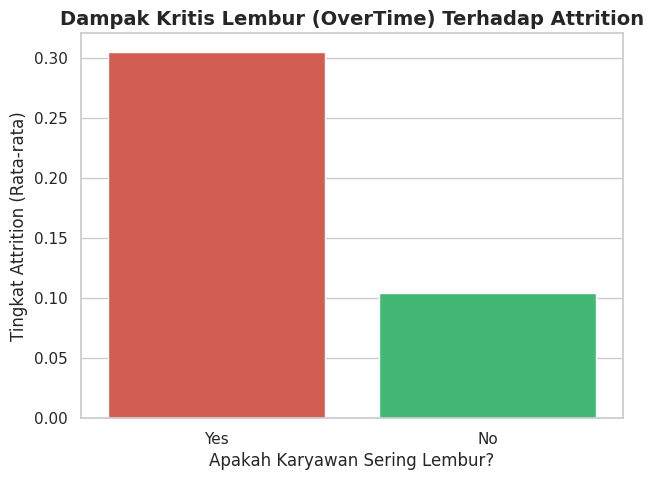

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (7, 5)

sns.barplot(
    data=df_prepared,
    x='OverTime',
    y='Attrition_Binary',
    errorbar=None,
    palette=['#e74c3c', '#2ecc71'] # Merah (risiko tinggi) untuk Yes, Hijau (risiko rendah) untuk No
)

plt.title('Dampak Kritis Lembur (OverTime) Terhadap Attrition', fontsize=14, fontweight='bold')
plt.xlabel('Apakah Karyawan Sering Lembur?', fontsize=12)
plt.ylabel('Tingkat Attrition (Rata-rata)', fontsize=12)
plt.xticks(rotation=0)

plt.show()

## 3. Seberapa besar korelasi antara tingkat kepuasan kerja yang dirasakan karyawan dengan kemungkinan mereka untuk keluar dari perusahaan?

Tujuan : Mengukur dan memvalidasi apakah investasi dalam meningkatkan JobSatisfaction dapat secara signifikan menurunkan Attrition Rate di PT Vinix Seven Aurum.

In [ ]:
# --- Analisis Attrition Rate berdasarkan JobSatisfaction ---
print("\n--- Attrition Rate berdasarkan JobSatisfaction ---")
# JobSatisfaction: 1=Low, 2=Medium, 3=High, 4=Very High
attrition_by_satisfaction = df_prepared.groupby('JobSatisfaction')['Attrition_Binary'].mean().sort_values(ascending=False)
attrition_by_satisfaction_df = attrition_by_satisfaction.to_frame(name='Attrition Rate').reset_index()
attrition_by_satisfaction_df['Attrition Rate %'] = attrition_by_satisfaction_df['Attrition Rate'] * 100
display(attrition_by_satisfaction_df.drop(columns='Attrition Rate'))


--- Attrition Rate berdasarkan JobSatisfaction ---


,JobSatisfaction,Attrition Rate %
0,1,22.837370
1,3,16.515837
2,2,16.428571
3,4,11.328976


/tmp/ipython-input-1283027744.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


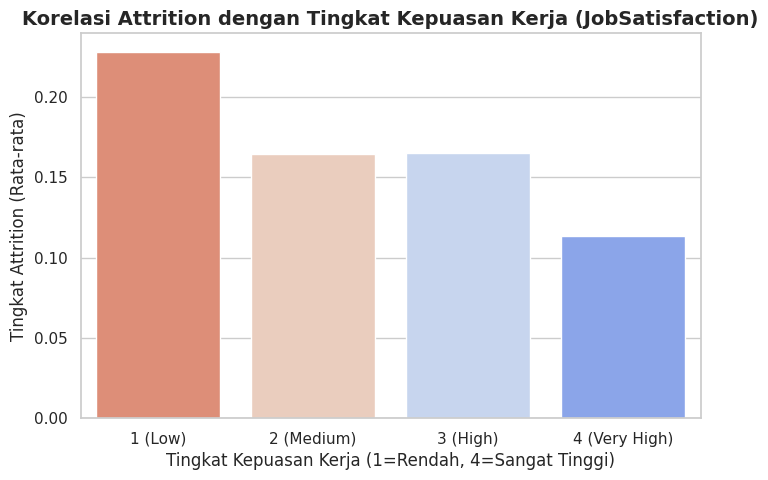

In [ ]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)

sns.barplot(
    data=df_prepared,
    x='JobSatisfaction',
    y='Attrition_Binary',
    errorbar=None,
    palette='coolwarm_r'
)

plt.title('Korelasi Attrition dengan Tingkat Kepuasan Kerja (JobSatisfaction)', fontsize=14, fontweight='bold')
plt.xlabel('Tingkat Kepuasan Kerja (1=Rendah, 4=Sangat Tinggi)', fontsize=12)
plt.ylabel('Tingkat Attrition (Rata-rata)', fontsize=12)
plt.xticks([0, 1, 2, 3], ['1 (Low)', '2 (Medium)', '3 (High)', '4 (Very High)'])

plt.show()

## 4. Pada tingkat WorkLifeBalance berapa karyawan mulai menunjukkan risiko resign yang sangat tinggi, dan seberapa drastis perbedaannya dari tingkat WLB yang optimal?

Tujuan : Memetakan gradien risiko Attrition pada setiap tingkat WorkLifeBalance untuk mengidentifikasi ambang batas terendah yang dapat diterima perusahaan

In [ ]:
# --- Analisis Attrition Rate berdasarkan WorkLifeBalance ---
print("--- Attrition Rate berdasarkan WorkLifeBalance ---")
# WorkLifeBalance: 1=Bad, 2=Good, 3=Better, 4=Best
# Kita lihat bagaimana rata-rata Attrition (1) berubah seiring kualitas WorkLifeBalance.
attrition_by_wlb = df_prepared.groupby('WorkLifeBalance')['Attrition_Binary'].mean().sort_values(ascending=False)
attrition_by_wlb_df = attrition_by_wlb.to_frame(name='Attrition Rate').reset_index()
attrition_by_wlb_df['WorkLifeBalance_Description'] = attrition_by_wlb_df['WorkLifeBalance'].map({1: '1 (Bad)', 2: '2 (Good)', 3: '3 (Better)', 4: '4 (Best)'})
attrition_by_wlb_df['Attrition Rate %'] = attrition_by_wlb_df['Attrition Rate'] * 100
display(attrition_by_wlb_df.drop(columns=['Attrition Rate', 'WorkLifeBalance']))



--- Attrition Rate berdasarkan WorkLifeBalance ---


,WorkLifeBalance_Description,Attrition Rate %
0,1 (Bad),31.250000
1,4 (Best),17.647059
2,2 (Good),16.860465
3,3 (Better),14.221725


/tmp/ipython-input-1434076167.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


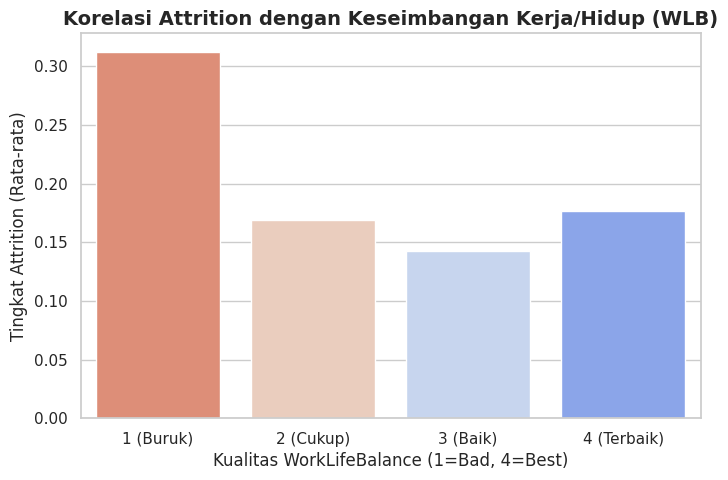

In [ ]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)

# Visualisasi: Bar Chart Attrition Rate berdasarkan WorkLifeBalance
sns.barplot(
    data=df_prepared,
    x='WorkLifeBalance',
    y='Attrition_Binary',
    errorbar=None,
    palette='coolwarm_r'
)

plt.title('Korelasi Attrition dengan Keseimbangan Kerja/Hidup (WLB)', fontsize=14, fontweight='bold')
plt.xlabel('Kualitas WorkLifeBalance (1=Bad, 4=Best)', fontsize=12)
plt.ylabel('Tingkat Attrition (Rata-rata)', fontsize=12)
plt.xticks([0, 1, 2, 3], ['1 (Buruk)', '2 (Cukup)', '3 (Baik)', '4 (Terbaik)'])

# Menampilkan grafik
plt.show()

## 5. Kombinasi Level Jabatan (JobLevel) dan Tingkat Gaji (Income_Level) manakah yang menciptakan risiko Attrition tertinggi di PT Vinix Seven Aurum?

Tujuan : Mengidentifikasi dan memvisualisasikan hotspot risiko retensi (seperti Job Level 1 Low Income) untuk memandu penyesuaian gaji dan kebijakan karir yang ditargetkan.

In [ ]:
# Tampilkan data tabel yang dianalisis
print("\n--- Data Pendukung Heatmap (Tabel Persentase Risiko) ---")
attrition_by_level_mean = df_prepared.groupby('JobLevel')['Attrition_Binary'].mean().to_frame(name='Overall Attrition Rate').reset_index()
attrition_by_level_income_unstack = df_prepared.groupby(['JobLevel', 'Income_Level'])['Attrition_Binary'].mean().unstack().reset_index()
final_pivot = attrition_by_level_income_unstack.merge(attrition_by_level_mean, on='JobLevel', how='left').set_index('JobLevel')
final_pivot_perc = (final_pivot * 100).applymap(lambda x: f'{x:.2f}%' if pd.notna(x) else '-')
display(final_pivot_perc)


--- Data Pendukung Heatmap (Tabel Persentase Risiko) ---


/tmp/ipython-input-1782194551.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_by_level_income_unstack = df_prepared.groupby(['JobLevel', 'Income_Level'])['Attrition_Binary'].mean().unstack().reset_index()
/tmp/ipython-input-1782194551.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  final_pivot_perc = (final_pivot * 100).applymap(lambda x: f'{x:.2f}%' if pd.notna(x) else '-')


,Low Income,Medium Income,High Income,Overall Attrition Rate
JobLevel,,,,
1,27.55%,19.51%,-,26.34%
2,4.17%,9.98%,10.09%,9.74%
3,-,50.00%,14.35%,14.68%
4,-,-,4.72%,4.72%
5,-,-,7.25%,7.25%


/tmp/ipython-input-3513515057.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_by_level_income = df_prepared.groupby(['JobLevel', 'Income_Level'])['Attrition_Binary'].mean().unstack()


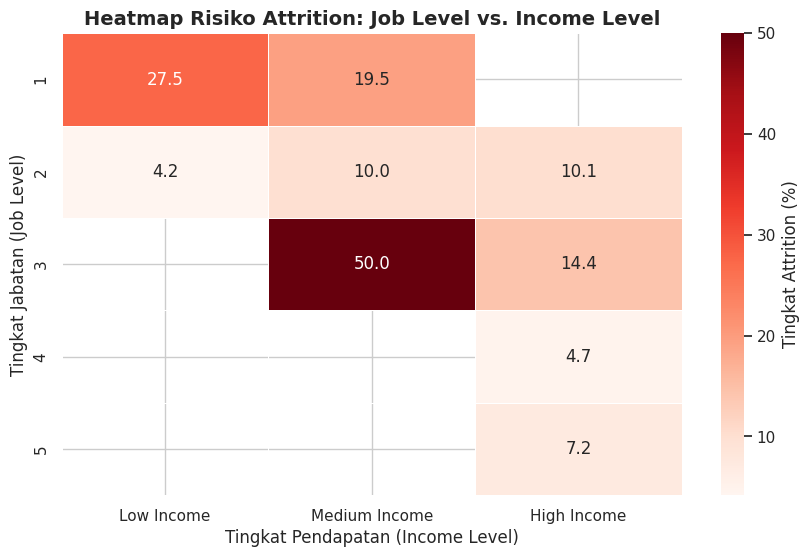

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

attrition_by_level_income = df_prepared.groupby(['JobLevel', 'Income_Level'])['Attrition_Binary'].mean().unstack()

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# --- Visualisasi Heatmap (Peta Risiko) ---
sns.heatmap(
    attrition_by_level_income * 100, # Kali 100 untuk menampilkan persentase
    annot=True, # Tampilkan nilai angka di dalam sel
    fmt=".1f", # Format satu angka desimal
    cmap='Reds', # Gunakan palet 'Reds' untuk menyorot risiko tinggi
    linewidths=.5, # Tambahkan garis pemisah antar sel
    cbar_kws={'label': 'Tingkat Attrition (%)'} # Label color bar
)

plt.title('Heatmap Risiko Attrition: Job Level vs. Income Level', fontsize=14, fontweight='bold')
plt.xlabel('Tingkat Pendapatan (Income Level)', fontsize=12)
plt.ylabel('Tingkat Jabatan (Job Level)', fontsize=12)

plt.show()



---



---



# 5. Insight dan Makna Bisnis

A) Insight
1. Tingkat attrition sebesar 16,1% menandakan bahwa perputaran karyawan berada pada level yang perlu menjadi perhatian prioritas manajemen. Angka ini menunjukkan adanya masalah retensi struktural yang memiliki dampak langsung terhadap stabilitas operasional.
2. Data menunjukkan bahwa frekuensi lembur merupakan variabel dengan kontribusi terbesar terhadap meningkatnya risiko pengunduran diri. Karyawan dengan beban lembur tinggi memiliki kecenderungan attrition yang jauh lebih besar dibandingkan karyawan tanpa lembur.
3. Tingkat pendapatan rendah (Low Monthly Income) terbukti memiliki kecenderungan attrition yang lebih tinggi dibanding kelompok pendapatan lainnya. Hal ini menunjukkan bahwa struktur kompensasi memiliki peran signifikan dalam keputusan karyawan untuk bertahan atau keluar.
4. Mayoritas kasus attrition berasal dari kelompok JobLevel 1 hingga 3. Hal ini mengindikasikan adanya ketidakseimbangan antara tuntutan pekerjaan, kompensasi, dan prospek pengembangan karier pada lapisan organisasi tersebut.
5. Rendahnya WorkLifeBalance dan JobSatisfaction terbukti meningkatkan probabilitas attrition. Karyawan yang tidak mendapatkan keseimbangan kerja hidup yang memadai cenderung mengalami kelelahan kerja (burnout), yang berujung pada keputusan keluar.
6. Komposisi gender yang terdiri dari 60% laki-laki dan 40% perempuan tidak menunjukkan pengaruh yang signifikan terhadap attrition, sehingga tidak menjadi faktor pemicu.
7. Kombinasi JobLevel 1 dan Income Level rendah menandakan masalah retensi lebih dipengaruhi oleh kompensasi yang belum memadai dan lingkungan kerja pada level awal karier menyebabkan tingginya tingkat attrition.

B) Makna Bisnis :
1. Insight yang diperoleh mencerminkan adanya mismatch antara beban kerja operasional  terutama pada karyawan dengan lembur tinggi dan tugas berat pada role tertentu  dengan struktur kompensasi (Monthly Income) serta peluang karier yang tersedia. Ketidakseimbangan ini dapat melemahkan loyalitas dan persepsi keadilan organisasi.
2. Tingginya attrition menyebabkan peningkatan biaya rekrutmen, pelatihan, dan onboarding, serta menurunkan produktivitas tim  terutama pada peran kritis seperti Sales Representative dan Laboratory Technician. Kekosongan berulang pada role tersebut dapat mengganggu kesinambungan proses bisnis dan performa pendapatan perusahaan.
3. Upaya retensi perlu diarahkan secara spesifik kepada segmen yang paling rentan yaitu JobLevel 1–3, kelompok Low Income, dan JobRole dengan tekanan tinggi. Intervensi berbasis segmen pada kelompok ini akan memberikan dampak terbesar dalam meningkatkan retensi dan stabilitas tenaga kerja.

# 6. Kesimpulan dan Rekomendasi

A) Kesimpulan :

* Tingkat attrition sebesar 16,2% menunjukkan adanya masalah retensi yang signifikan dan berdampak pada stabilitas operasional serta biaya tenaga kerja.
* Faktor utama penyebab attrition adalah tingginya beban lembur, rendahnya pendapatan, serta rendahnya WorkLifeBalance dan JobSatisfaction.
* Kelompok paling rentan terhadap attrition adalah karyawan pada JobLevel 1–3 dengan pendapatan rendah, khususnya pada posisi operasional seperti Sales Representative dan Laboratory Technician.
* Strategi retensi perlu difokuskan pada peningkatan kompensasi, manajemen beban kerja, dan pengembangan jalur karier untuk meningkatkan komitmen dan loyalitas karyawan.


B) Rekomendasi :
- **Perbaikan Struktur Kompensasi**,
Lakukan benchmarking gaji untuk posisi operasional seperti Sales Representative dan Laboratory Technician guna memastikan kompensasi kompetitif dan adil.

- **Pengelolaan Lembur yang Lebih Efektif**,
Audit beban kerja pada divisi dengan lembur tinggi dan terapkan batas maksimal jam lembur serta kompensasi transparan atau cuti pengganti untuk menjaga WorkLifeBalance.

- **Penyusunan Jalur Karier yang Jelas**,
Sediakan career roadmap, program mentoring, dan pelatihan untuk karyawan level 1–3 agar memiliki prospek pengembangan yang jelas dan meningkatkan motivasi jangka panjang.

- **Program Dukungan Kesejahteraan Karyawan**,
Implementasikan program kesejahteraan seperti EAP, fleksibilitas waktu kerja, dan no-meeting day untuk menurunkan stres, meningkatkan JobSatisfaction, dan mencegah burnout.